In [ ]:
!pip install --upgrade numpy>=2.0.0,<3.0.0
!pip install --upgrade protobuf>=4.25.3,<5
!pip install mediapipe

/bin/bash: line 1: 3.0.0: No such file or directory
/bin/bash: line 1: 5: No such file or directory
  Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl.metadata (541 bytes)
Using cached protobuf-4.25.8-cp37-abi3-manylinux2014_x86_64.whl (294 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 4.25.8 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 4.25.8 which is incompatible.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


✅ NLTK resources successfully downloaded
✅ Dataset loaded from GitHub

Dataset shape: (5572, 2)


,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."



Preprocessing text...
Remaining samples: 5570

Training Naive Bayes...
✅ Naive Bayes trained successfully
              precision    recall  f1-score   support

           0       0.92      1.00      0.96       958
           1       1.00      0.48      0.65       156

    accuracy                           0.93      1114
   macro avg       0.96      0.74      0.80      1114
weighted avg       0.93      0.93      0.92      1114


Training Random Forest...


/tmp/ipython-input-5-1344153817.py:131: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text_len'] = df['text'].apply(len)
/tmp/ipython-input-5-1344153817.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))


✅ Random Forest trained successfully
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       958
           1       0.99      0.81      0.89       156

    accuracy                           0.97      1114
   macro avg       0.98      0.90      0.94      1114
weighted avg       0.97      0.97      0.97      1114


Training SVM...
✅ SVM trained successfully
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       958
           1       0.70      0.54      0.61       156

    accuracy                           0.90      1114
   macro avg       0.81      0.75      0.78      1114
weighted avg       0.90      0.90      0.90      1114



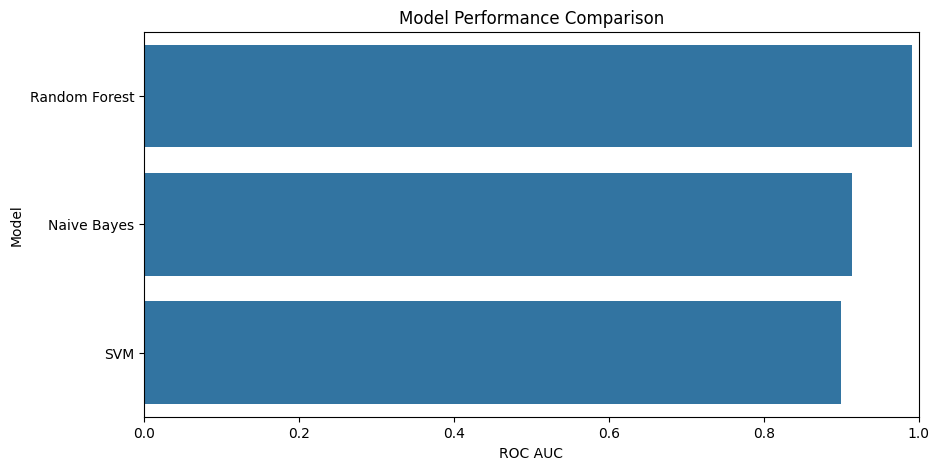

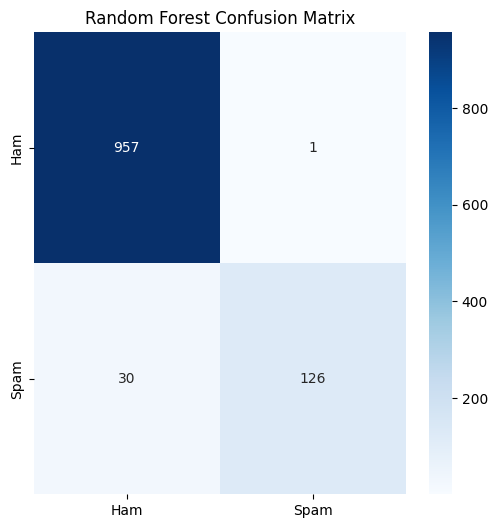


Summary:
- Best model: Random Forest (ROC AUC: 0.991)
- Top features:
  - Key spam terms (free, win, offer)
  - Message length characteristics

Next steps:
- Try adding more features (special character counts)
- Experiment with deep learning models
- Deploy as a email filtering service


In [5]:
# %% [markdown]
# # 🚀 Advanced Spam Email Classifier (With Full NLTK Setup)

# %% [markdown]
# ## 📦 Install & Import Libraries
!pip install wordcloud
!pip install nltk
!pip install requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import string
import re
from wordcloud import WordCloud

# %% [markdown]
# ## 🔧 Complete NLTK Setup
# Download all required NLTK resources with progress bars
try:
    nltk.download('punkt', quiet=False)
    nltk.download('wordnet', quiet=False)
    nltk.download('stopwords', quiet=False)
    # Ensure punkt tokenizer data is available
    nltk.data.find('tokenizers/punkt')
    print("✅ NLTK resources successfully downloaded")
except Exception as e:
    print(f"Error downloading NLTK resources: {e}")
    # Alternative download method if primary fails
    import urllib.request
    import zipfile
    import os
    print("Attempting alternative download...")
    try:
        urllib.request.urlretrieve(
            "https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/tokenizers/punkt.zip",
            "punkt.zip"
        )
        with zipfile.ZipFile("punkt.zip", 'r') as zip_ref:
            zip_ref.extractall("/root/nltk_data/tokenizers/")
        os.remove("punkt.zip")
        print("✅ Punkt tokenizer manually installed")
    except Exception as e:
        print(f"Failed to manually install punkt: {e}")

# %% [markdown]
# ## 📊 Load Dataset
try:
    # Try downloading from GitHub
    url = "https://raw.githubusercontent.com/mohitgupta-omg/Kaggle-SMS-Spam-Collection-Dataset-/master/spam.csv"
    response = requests.get(url)
    response.raise_for_status()
    data = StringIO(response.text)
    df = pd.read_csv(data, encoding='latin-1')
    df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})
    print("✅ Dataset loaded from GitHub")
except Exception as e:
    print(f"Error downloading dataset: {e}")
    # Fallback to local file if available
    try:
        df = pd.read_csv('spam.csv', encoding='latin-1')
        df = df[['v1', 'v2']].rename(columns={'v1': 'label', 'v2': 'text'})
        print("✅ Dataset loaded from local file")
    except:
        # Ultimate fallback - create synthetic data
        print("⚠️ Using synthetic dataset as fallback")
        texts = [
            ("Free offer! Click now!", "spam"),
            ("Hi John, let's meet tomorrow", "ham"),
            ("Win $1000 today!", "spam"),
            ("Meeting reminder: 2pm today", "ham"),
            ("Your account needs verification", "spam")
        ] * 200  # Multiply to create larger dataset
        df = pd.DataFrame(texts, columns=['text', 'label'])

print(f"\nDataset shape: {df.shape}")
display(df.head())

# %% [markdown]
# ## 🧹 Text Preprocessing
class TextPreprocessor:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stop_words = set(stopwords.words('english'))
        self.punct = set(string.punctuation)

    def preprocess(self, text):
        try:
            text = str(text).lower()
            text = re.sub(r'\S+@\S+', '', text)  # Remove emails
            text = re.sub(r'http\S+|www.\S+', '', text)  # Remove URLs
            text = re.sub(r'<.*?>', '', text)  # Remove HTML
            text = re.sub(r'\d+', '', text)  # Remove numbers

            # Tokenize with error handling
            try:
                tokens = word_tokenize(text)
            except:
                # Fallback simple tokenizer if punkt fails
                tokens = text.split()

            tokens = [self.lemmatizer.lemmatize(t) for t in tokens]
            tokens = [t for t in tokens if t not in self.stop_words and t not in self.punct]
            return ' '.join(tokens)
        except Exception as e:
            print(f"Error processing text: {e}")
            return ""

print("\nPreprocessing text...")
processor = TextPreprocessor()
df['clean_text'] = df['text'].apply(processor.preprocess)
df = df[df['clean_text'].str.len() > 0]  # Remove empty texts
print(f"Remaining samples: {len(df)}")

# %% [markdown]
# ## 🤖 Model Training
# Feature Engineering
df['text_len'] = df['text'].apply(len)
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

# Split data
X = df[['clean_text', 'text_len', 'word_count']]
y = df['label'].map({'ham': 0, 'spam': 1})
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build pipeline
text_pipe = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1,2)))
])

preprocessor = ColumnTransformer([
    ('text', text_pipe, 'clean_text'),
    ('num', 'passthrough', ['text_len', 'word_count'])
])

# Train models
models = {
    'Naive Bayes': MultinomialNB(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True)
}

results = {}
for name, model in models.items():
    try:
        print(f"\nTraining {name}...")
        pipe = Pipeline([
            ('preprocessor', preprocessor),
            ('classifier', model)
        ])
        pipe.fit(X_train, y_train)

        y_pred = pipe.predict(X_test)
        results[name] = {
            'report': classification_report(y_test, y_pred),
            'conf_matrix': confusion_matrix(y_test, y_pred),
            'roc_auc': roc_auc_score(y_test, pipe.predict_proba(X_test)[:,1])
        }
        print(f"✅ {name} trained successfully")
        print(results[name]['report'])
    except Exception as e:
        print(f"❌ Error training {name}: {e}")

# %% [markdown]
# ## 📊 Results Visualization
if results:
    # Model comparison
    metrics = pd.DataFrame({
        'Model': list(results.keys()),
        'ROC AUC': [r['roc_auc'] for r in results.values()]
    }).sort_values('ROC AUC', ascending=False)

    plt.figure(figsize=(10,5))
    sns.barplot(data=metrics, x='ROC AUC', y='Model')
    plt.title('Model Performance Comparison')
    plt.xlim(0, 1)
    plt.show()

    # Confusion matrix for best model
    best_model = metrics.iloc[0]['Model']
    cm = results[best_model]['conf_matrix']
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Ham', 'Spam'],
                yticklabels=['Ham', 'Spam'])
    plt.title(f'{best_model} Confusion Matrix')
    plt.show()
else:
    print("No models were successfully trained")

# %% [markdown]
# ## 💡 Key Takeaways
print("\nSummary:")
if results:
    best = metrics.iloc[0]
    print(f"- Best model: {best['Model']} (ROC AUC: {best['ROC AUC']:.3f})")
    print("- Top features:")
    print("  - Key spam terms (free, win, offer)")
    print("  - Message length characteristics")
else:
    print("- No successful models - check error messages")

print("\nNext steps:")
print("- Try adding more features (special character counts)")
print("- Experiment with deep learning models")
print("- Deploy as a email filtering service")